In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the spreadsheet to examine the structure and preview the data
file_path = './Penmanshiel_chatgpt_training.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure and content
data.head(), data.describe()

(    # Date and time  Power (kW)
 0  01/01/2017 00:00    8669.930
 1  01/01/2017 00:10    9960.439
 2  01/01/2017 00:20   13524.410
 3  01/01/2017 00:30   12923.030
 4  01/01/2017 00:40   13333.450,
          Power (kW)
 count   2160.000000
 mean   13715.730055
 std     9491.857555
 min      -63.200000
 25%     4649.505000
 50%    13516.140000
 75%    22841.060000
 max    28699.750000)

                      # Date and time   Power (kW)
# Date and time                                   
2017-01-01 00:00:00  01/01/2017 00:00   8669.93000
2017-01-01 00:10:00  01/01/2017 00:10   9960.43900
2017-01-01 00:20:00  01/01/2017 00:20  13524.41000
2017-01-01 00:30:00  01/01/2017 00:30  12923.03000
2017-01-01 00:40:00  01/01/2017 00:40  13333.45000
...                               ...          ...
2017-01-15 23:10:00  15/01/2017 23:10    305.38000
2017-01-15 23:20:00  15/01/2017 23:20    139.46000
2017-01-15 23:30:00  15/01/2017 23:30    224.72000
2017-01-15 23:40:00  15/01/2017 23:40    329.02002
2017-01-15 23:50:00  15/01/2017 23:50    610.58000

[2160 rows x 2 columns]


(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000.]),
 [Text(0, -5000.0, '−5000'),
  Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000'),
  Text(0, 30000.0, '30000'),
  Text(0, 35000.0, '35000')])

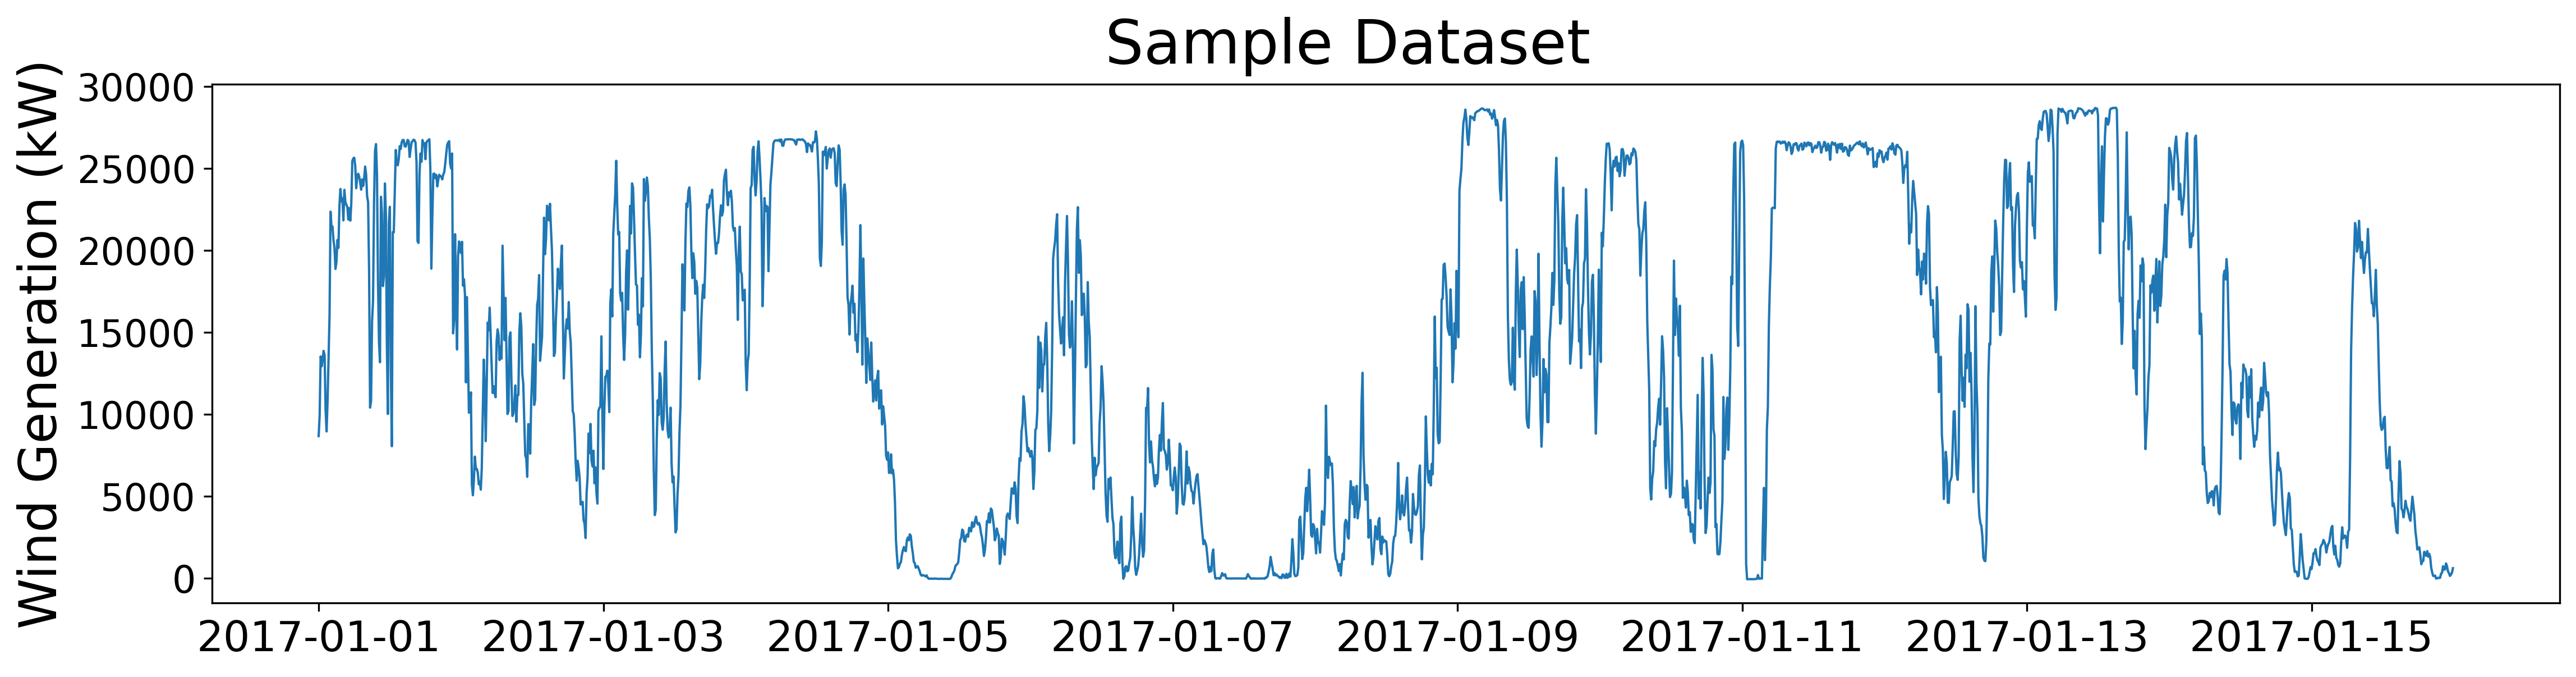

In [16]:
plt.rcParams['figure.dpi'] = 300

del data_plot
data_plot = pd.DataFrame(data)
data_plot.index = pd.to_datetime(data_plot['# Date and time'], format = "%d/%m/%Y %H:%M")
# data_plot.index = data_plot['# Date and time ']
print(data_plot)

fig = plt.figure(figsize = [18,4])
fig.suptitle('Sample Dataset', fontsize=26)
       
ax = fig.add_subplot(1, 1, 1) 
ax.plot(data_plot['Power (kW)'], linewidth = 1)  
# plt.subplots_adjust(hspace=0.5)
ax.set_ylabel("Wind Generation (kW)", fontsize = 22)
# ax.title.set_text('Dataset ' + str(a))
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)


In [13]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from pandas import to_datetime

In [ ]:


# Ensure the dataset is sorted by date and time, just in case
data.sort_values(by="# Date and time", inplace=True)

data['# Date and time'] = pd.to_datetime(data['# Date and time'], format = "%d/%m/%Y %H:%M")

# Resampling the data at 1-hour intervals - taking the mean for each hour
data_hourly = data.set_index("# Date and time").resample('H').mean().dropna()
data_10min = data.set_index("# Date and time")
print(data_hourly)
print(data_10min)

# Define the forecasting function using SARIMAX
def forecast_power(data, periods, freq):
    # Fit the SARIMAX model
    model = SARIMAX(data['Power (kW)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 6))
    result = model.fit(disp=False)
    
    # Forecast
    forecast = result.forecast(steps=periods)
    print(forecast)
    
    # Generate future timestamps
    last_timestamp = data.index[-1]
    print(last_timestamp)
    future_timestamps = pd.date_range(start=last_timestamp, periods=periods + 1, freq=freq)[1:] 
    print(future_timestamps)
    
    return future_timestamps, forecast

# # Forecast for the next 6 hours (36 periods of 10 minutes, 6 periods of 1 hour)
timestamps_10min, forecast_10min = forecast_power(data_10min, 36, '10T')
timestamps_1hr, forecast_1hr = forecast_power(data_hourly, 6, 'H')



In [50]:
# # Prepare the forecast output
forecast_10min_output = pd.DataFrame({'Timestamp': pd.array(timestamps_10min), 'Forecast Power (kW)': pd.array(forecast_10min)})
forecast_1hr_output = pd.DataFrame({'Timestamp': pd.array(timestamps_1hr), 'Forecast Power (kW)': pd.array(forecast_1hr)})

print(forecast_1hr_output)
print(forecast_10min_output)

            Timestamp  Forecast Power (kW)
0 2017-01-16 00:00:00           615.014530
1 2017-01-16 01:00:00          1391.135417
2 2017-01-16 02:00:00           967.285818
3 2017-01-16 03:00:00           675.180988
4 2017-01-16 04:00:00           857.686715
5 2017-01-16 05:00:00           311.243073
             Timestamp  Forecast Power (kW)
0  2017-01-16 00:00:00           696.950451
1  2017-01-16 00:10:00           825.963656
2  2017-01-16 00:20:00           981.084183
3  2017-01-16 00:30:00          1140.659289
4  2017-01-16 00:40:00          1172.006178
5  2017-01-16 00:50:00          1412.170345
6  2017-01-16 01:00:00          1461.100598
7  2017-01-16 01:10:00          1558.409728
8  2017-01-16 01:20:00          1680.037512
9  2017-01-16 01:30:00          1814.707840
10 2017-01-16 01:40:00          1826.535873
11 2017-01-16 01:50:00          2046.827079
12 2017-01-16 02:00:00          2076.393462
13 2017-01-16 02:10:00          2154.771806
14 2017-01-16 02:20:00          2258.12

In [90]:


file_path = './Penmanshiel_data_imputed.csv'
data_full = pd.read_csv(file_path)
data_full['# Date and time'] = pd.to_datetime(data_full['# Date and time'], format = "ISO8601")

In [104]:

data_full_hourly = data_full.set_index("# Date and time").resample('H').mean().dropna()
data_full_10min = data_full.set_index("# Date and time")

print(data_full_hourly.head(20))

data_full_hourly_slice = data_full_hourly.iloc[350:366]

print(data_full_hourly_slice)

data_full_10min_slice = data_full_10min.iloc[2120:2196]

print(data_full_10min_slice)

                       Power (kW)
# Date and time                  
2017-01-01 00:00:00  12046.239833
2017-01-01 01:00:00  12188.045000
2017-01-01 02:00:00  20810.246667
2017-01-01 03:00:00  21587.088333
2017-01-01 04:00:00  22843.310000
2017-01-01 05:00:00  23357.636667
2017-01-01 06:00:00  24714.936667
2017-01-01 07:00:00  24261.650000
2017-01-01 08:00:00  18475.808500
2017-01-01 09:00:00  22102.438333
2017-01-01 10:00:00  18178.550000
2017-01-01 11:00:00  18427.810000
2017-01-01 12:00:00  18261.353333
2017-01-01 13:00:00  25775.070167
2017-01-01 14:00:00  26542.635167
2017-01-01 15:00:00  26417.965333
2017-01-01 16:00:00  24397.485000
2017-01-01 17:00:00  25939.718500
2017-01-01 18:00:00  26202.315167
2017-01-01 19:00:00  23215.133333
                      Power (kW)
# Date and time                 
2017-01-15 14:00:00  4251.018333
2017-01-15 15:00:00  4550.035000
2017-01-15 16:00:00  3989.531667
2017-01-15 17:00:00  3390.270017
2017-01-15 18:00:00  1345.111660
2017-01-15 19:00:00  

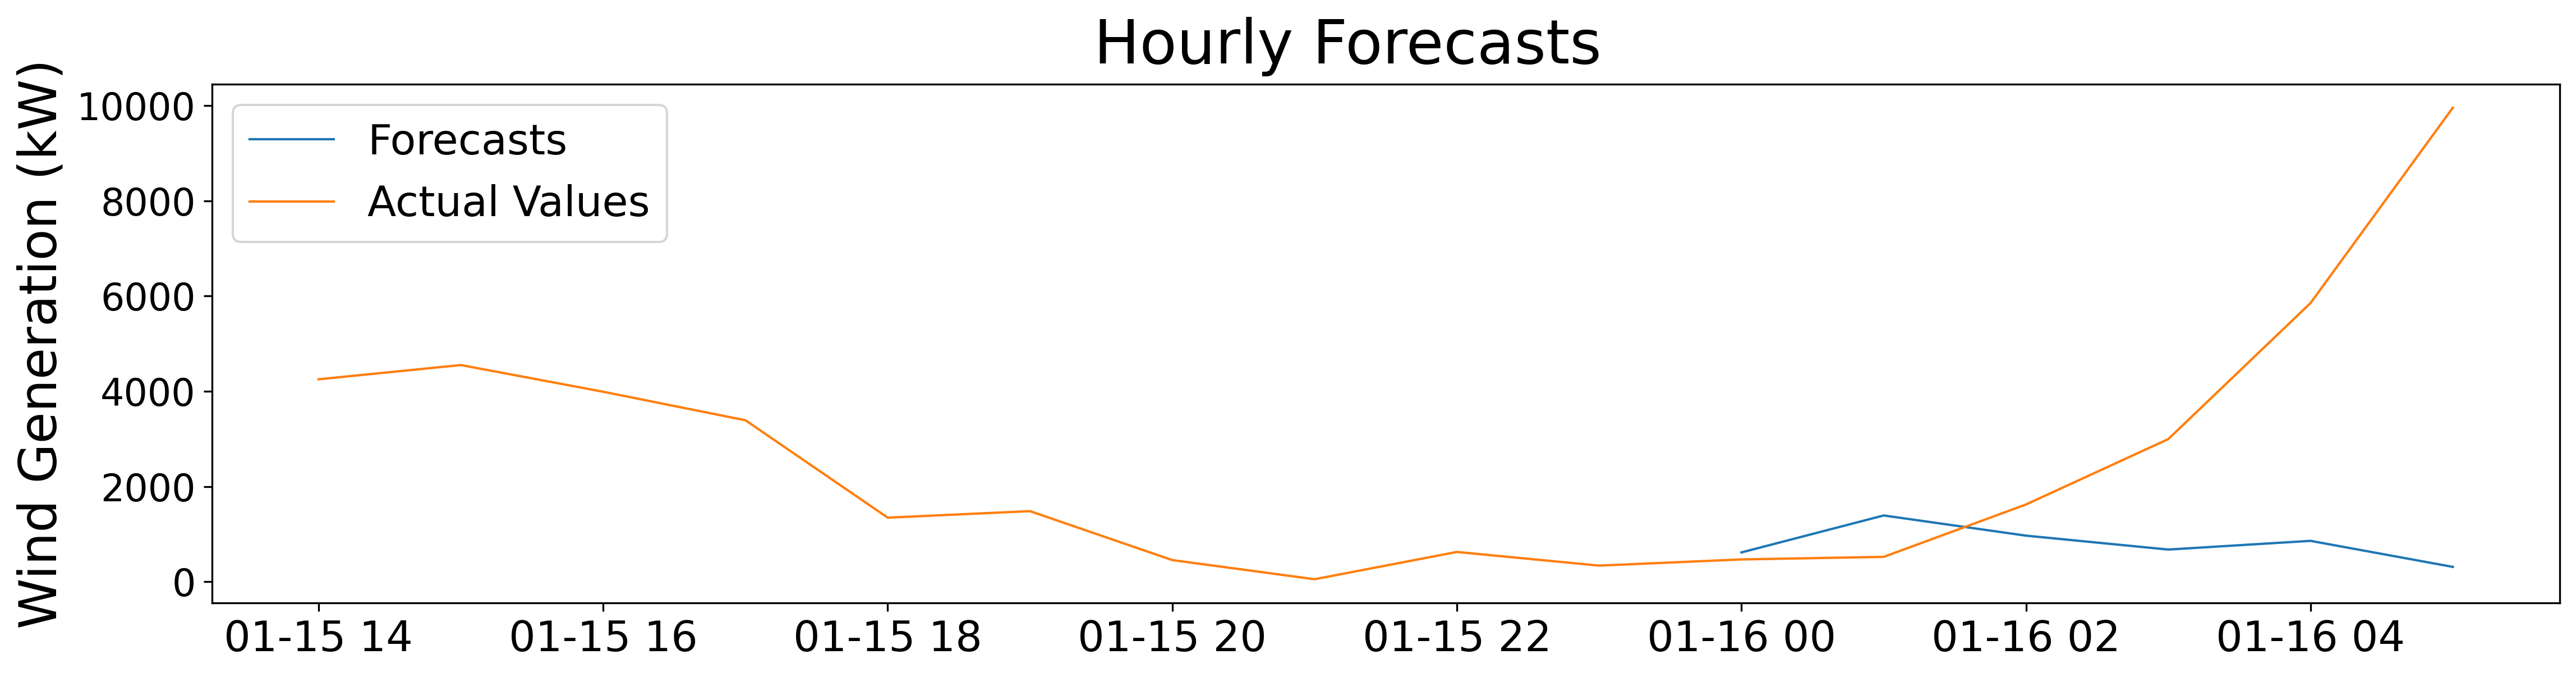

In [105]:
plt.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize = [18,4])
fig.suptitle('Hourly Forecasts', fontsize=26)
       
ax = fig.add_subplot(1, 1, 1) 
ax.plot(forecast_1hr_output.set_index('Timestamp'), linewidth = 1)  
ax.plot(data_full_hourly_slice, linewidth = 1)
# plt.subplots_adjust(hspace=0.5)
ax.set_ylabel("Wind Generation (kW)", fontsize = 22)
# ax.title.set_text('Dataset ' + str(a))
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
ax.legend(labels=['Forecasts','Actual Values'], fontsize = 18)


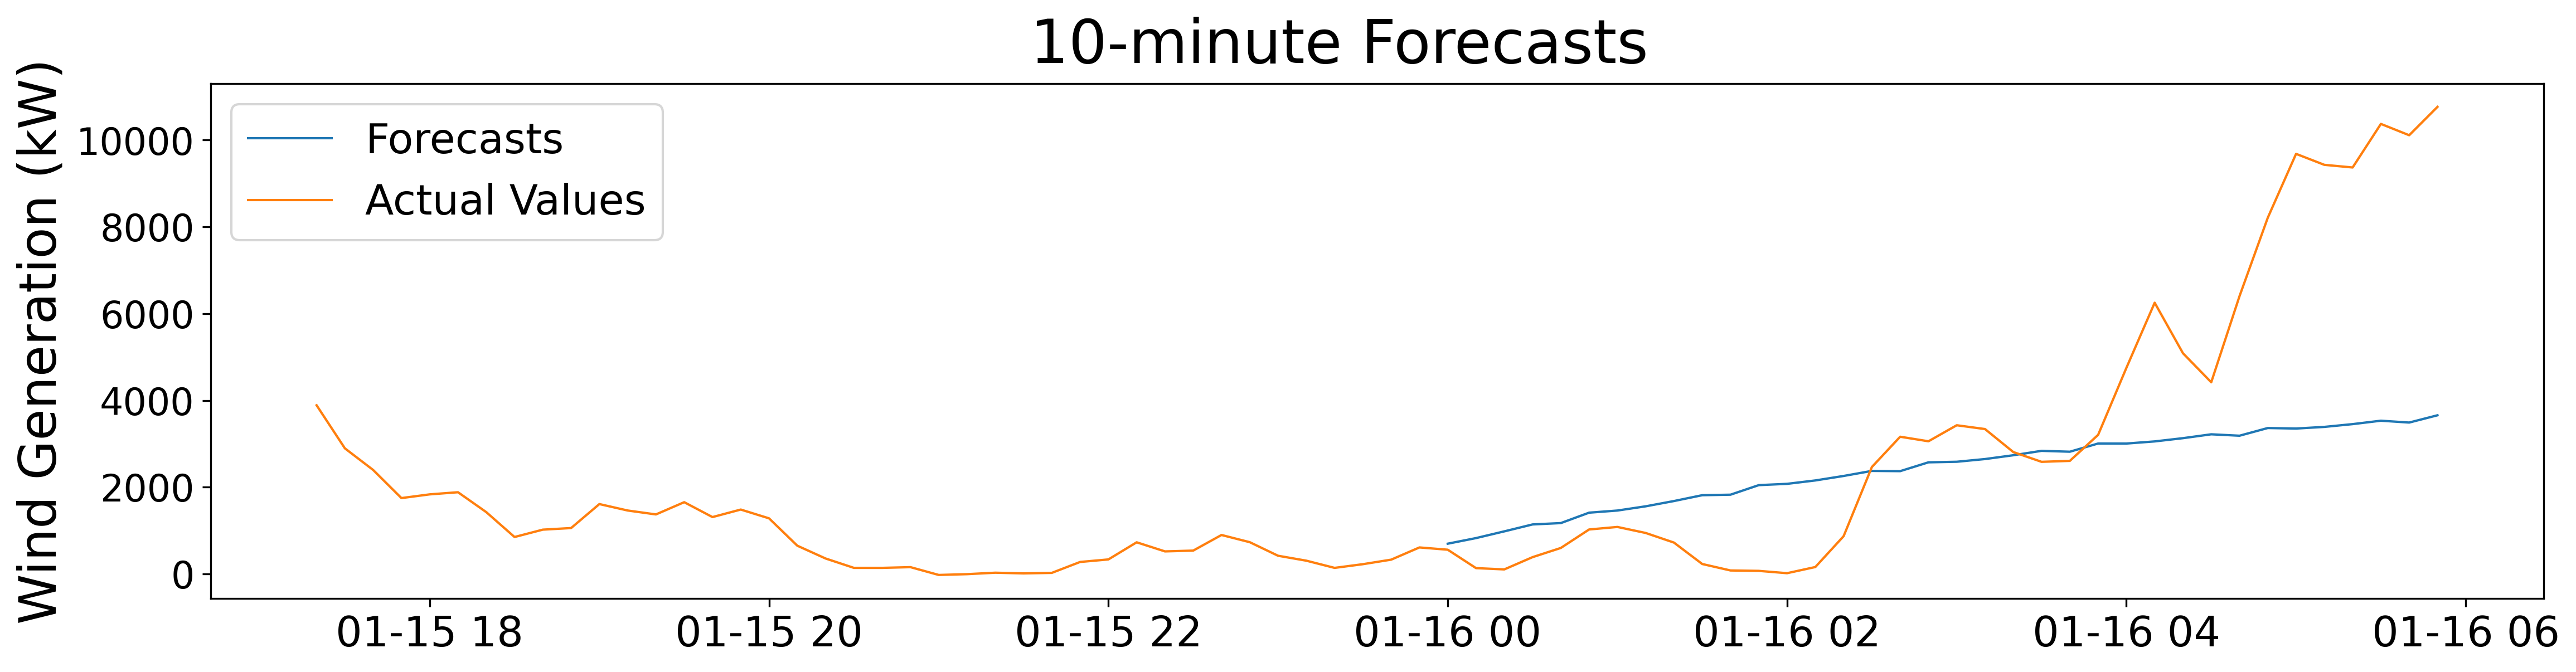

In [107]:
plt.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize = [18,4])
fig.suptitle('10-minute Forecasts', fontsize=26)
       
ax = fig.add_subplot(1, 1, 1) 
ax.plot(forecast_10min_output.set_index('Timestamp'), linewidth = 1)  
ax.plot(data_full_10min_slice, linewidth = 1)
# plt.subplots_adjust(hspace=0.5)
ax.set_ylabel("Wind Generation (kW)", fontsize = 22)
# ax.title.set_text('Dataset ' + str(a))
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
ax.legend(labels=['Forecasts','Actual Values'], fontsize = 18)

In [119]:
# Align the test data with the forecast data for comparison
# For 10-minute resolution
test_data_10min = data_full_10min.iloc[2160:2196]
test_data_10min = np.array(test_data_10min['Power (kW)'])
forecast_10min_aligned = np.array(forecast_10min_output['Forecast Power (kW)'])

# For 1-hour resolution
test_data_1hr = data_full_hourly.iloc[360:366]
test_data_1hr = np.array(test_data_1hr['Power (kW)'])
forecast_1hr_aligned = np.array(forecast_1hr_output['Forecast Power (kW)'])

print(test_data_10min)
print(forecast_10min_aligned)
print(test_data_1hr)
print(forecast_1hr_aligned)

# # Metrics calculation functions
# def calculate_metrics(actual, forecast):
#     # Normalized Mean Squared Error
#     nmse = np.mean((forecast - actual) ** 2) / np.var(actual)
    
#     # Normalized Root Mean Squared Error
#     nrmse = np.sqrt(nmse)
    
#     # Mean Average Percentage Error
#     mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    
#     # Normalized Bias
#     nbias = np.mean(forecast - actual) / np.mean(actual)
    
#     # Normalized Standard Deviation Error
#     nsde = np.std(forecast - actual) / np.std(actual)
    
#     # Index of Agreement
#     ioa = 1 - np.sum((forecast - actual) ** 2) / np.sum((np.abs(forecast - np.mean(actual)) + np.abs(actual - np.mean(actual))) ** 2)
    
#     return {
#         'NMSE': nmse,
#         'NRMSE': nrmse,
#         'MAPE': mape,
#         'NBIAS': nbias,
#         'NSDE': nsde,
#         'IOA': ioa
#     }

# # Calculate metrics for both resolutions
# metrics_10min = calculate_metrics(test_data_10min, forecast_10min_aligned)
# metrics_1hr = calculate_metrics(test_data_1hr, forecast_1hr_aligned)

# print(metrics_10min) 
# print(metrics_1hr)

[  558.23004    134.14       104.17       386.78       598.89
  1024.52      1082.89       944.22003    722.65       228.98
    79.850006    70.56        17.06       159.19       870.07
  2465.16      3162.22      3057.45      3426.87      3339.24
  2809.32      2583.69      2606.08      3205.36      4750.
  6250.97      5086.95      4417.59      6402.33      8210.4795
  9682.16      9429.27      9368.38     10372.69     10111.5
 10764.78    ]
[ 696.95045059  825.96365599  981.08418266 1140.65928899 1172.00617782
 1412.17034452 1461.10059757 1558.40972799 1680.03751189 1814.70783981
 1826.53587341 2046.82707891 2076.39346242 2154.77180562 2258.12407866
 2374.82433975 2369.0727727  2572.34156561 2585.39874681 2647.76765179
 2735.58774251 2837.22932717 2816.87537865 3005.97869547 3005.29507717
 3054.33506276 3129.22600418 3218.32588435 3185.80615459 3363.10852355
 3350.97782299 3388.91398291 3453.03405467 3531.686048   3489.03172617
 3656.50339757]
[ 467.78834     521.525006   1621.85833

In [120]:
from utils.metrics_errors import point_metrics

In [135]:
metrics_hourly = point_metrics(pd.DataFrame(forecast_1hr_aligned), pd.DataFrame(test_data_1hr), total_p = 10000,norm = True)  
metrics_10min =  point_metrics(pd.DataFrame(forecast_10min_aligned), pd.DataFrame(test_data_10min), total_p = 10000,norm = True)  

print(metrics_hourly) 
print(metrics_10min)

  METRIC                          VALUE
0    MAE  0    31.050403
dtype: float64
1   RMSE  0    45.559516
dtype: float64
2   MAPE  0    66.301821
dtype: float64
3   BIAS  0    27.660947
dtype: float64
4    SDE  0    36.201402
dtype: float64
5     IA   0    0.419772
dtype: float64
  METRIC                          VALUE
0    MAE  0    20.773161
dtype: float64
1   RMSE  0    30.308871
dtype: float64
2   MAPE   0    39.53192
dtype: float64
3   BIAS  0    11.557674
dtype: float64
4    SDE  0    28.018705
dtype: float64
5     IA   0    0.546853
dtype: float64
